<a href="https://colab.research.google.com/github/daddyawesome/PythonStat/blob/master/SQLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the *cloud* environment

In [0]:
# Installing the PyDrive in Python Environment in Colab
!pip install -U -q PyDrive

In [0]:
# Importing the necessary libraries prior Authentcation

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

**Authentication of the user**

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Steps to follow**

Assign the variable `link` to the google drive link (as copied below) of the file.
Next, separate the `id` value from the link part to *get the content* of the file.

In [0]:
link = 'https://drive.google.com/open?id=1Z1PTRj0pdf4tUSu5RZqj2doFYn37W8Ce'
split, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('flight_information.db')

**SQLite connection**

In [0]:
import sqlite3
conn = sqlite3.connect("flight_information.db")
cur = conn.cursor()
list(cur.execute("select * from airlines limit 2;"))

[(0, '1', 'Private flight', '\\N', '-', None, None, None, 'Y'),
 (1, '2', '135 Airways', '\\N', None, 'GNL', 'GENERAL', 'United States', 'N')]

In [0]:
# Install all the necesary libraries
!apt install proj-bin libproj-dev libgeos-dev
!pip install -U git+https://github.com/matplotlib/basemap.git
!pip install pyproj==1.9.6

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


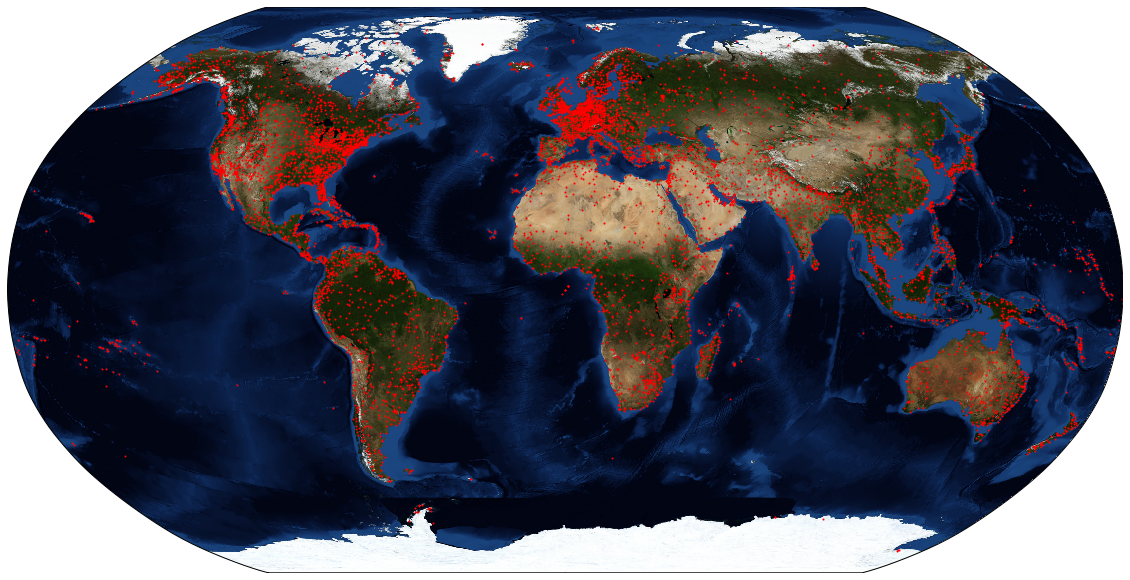

In [0]:
# Extract the co-ordinates of all airports from SQL database
airport_coordinates = cur.execute("""
   select cast(longitude as float),
   cast(latitude as float)
   from airports;""").fetchall()

# Load the necessary libraries and plot on map
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='robin',
            lon_0=0, lat_0=50, lat_1=20, lat_2=90,
            width=1.6E7, height=1.2E7, resolution='h')
m.bluemarble(scale=0.5);

x, y = m(
   [l[0] for l in airport_coordinates ],
   [l[1] for l in airport_coordinates ])

m.scatter(
       x,
       y,
       1,  marker='o',
       color='red')

In [0]:
# DB CONNECT and CREATE DATAFRAME
import pandas as pd

conn = sqlite3.connect("flight_information.db")
cur = conn.cursor()

airlines= pd.read_sql_query("select * from airlines;", conn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


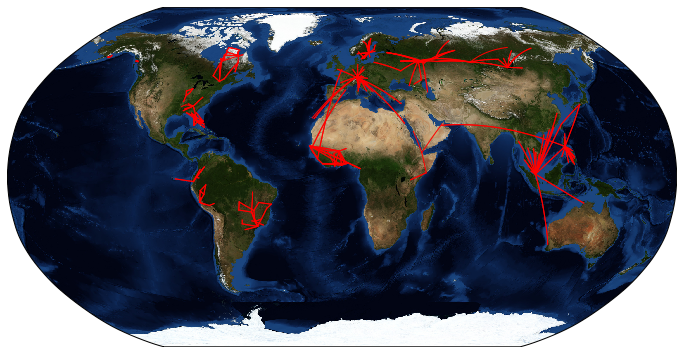

In [0]:
routes = pd.read_sql_query(""" select cast(so.longitude as float) as s_lon, cast(so.latitude as float) as s_lat, cast (de.longitude as float) as d_lon , cast(de.latitude as float) as d_lat from routes inner join airports so on so.id = routes.source_id  inner join airports de on de.id = routes.dest_id;""", conn)

 

# Plotting the first 500 routes in the database

 

fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='robin',
            lon_0=0, lat_0=50, lat_1=20, lat_2=90,
            width=1.6E7, height=1.2E7, resolution='c')
m.bluemarble(scale=0.5);

for name, row in routes[:500].iterrows():
    if abs(row["s_lon"] - row["d_lon"]) < 90:
        # Draw a great circle between source and dest airports.
        m.drawgreatcircle(
            row["s_lon"],
            row["s_lat"],
            row["d_lon"],
            row["d_lat"],
            linewidth=1,
            color='r'
        )

**INSERT operation**

In [0]:
 cur = conn.cursor()
cur.execute("insert into airlines values (6048, 19890, 'Test flight', '', '', null, null, null, 'Y')")
conn.commit()


pd.read_sql_query("select * from airlines where id=19890;", conn)

**UPDATE operation**

In [0]:
cur = conn.cursor()
values = ('Germany', 19890)
cur.execute("update airlines set country=? where id=?", values)
conn.commit()


pd.read_sql_query("select * from airlines where id=19890;", conn)

**DELETE operation**

In [0]:
cur = conn.cursor()

values = (19890, )
cur.execute("delete from airlines where id=?", values)
conn.commit()

pd.read_sql_query("select * from airlines where id=19890;", conn)

http://www.shekharbiswas.com/sqlite-with-python

http://www.shekharbiswas.com/introduction-to-statistics